In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import networkx as nx

In [3]:
help(pd.read_csv)

Help on function read_csv in module pandas.io.parsers.readers:

read_csv(
    filepath_or_buffer: 'FilePath | ReadCsvBuffer[bytes] | ReadCsvBuffer[str]',
    *,
    sep: 'str | None | lib.NoDefault' = <no_default>,
    delimiter: 'str | None | lib.NoDefault' = None,
    header: "int | Sequence[int] | None | Literal['infer']" = 'infer',
    names: 'Sequence[Hashable] | None | lib.NoDefault' = <no_default>,
    index_col: 'IndexLabel | Literal[False] | None' = None,
    usecols: 'UsecolsArgType' = None,
    dtype: 'DtypeArg | None' = None,
    engine: 'CSVEngine | None' = None,
    converters: 'Mapping[Hashable, Callable] | None' = None,
    true_values: 'list | None' = None,
    false_values: 'list | None' = None,
    skipinitialspace: 'bool' = False,
    skiprows: 'list[int] | int | Callable[[Hashable], bool] | None' = None,
    skipfooter: 'int' = 0,
    nrows: 'int | None' = None,
    na_values: 'Hashable | Iterable[Hashable] | Mapping[Hashable, Iterable[Hashable]] | None' = None,
  

In [4]:
tweet_dtypes: dict = {
    "user_id": "str",
    "tweet_id": "str",
    "retweeted_status_id": "str",
    "in_reply_to_status_id": "str"
}
user_dtype: dict = {
    "id": "str"
}

In [5]:
df_tweets = pd.read_csv('tweets.csv', dtype=tweet_dtypes)
df_users = pd.read_csv('users.csv', dtype=user_dtype)

In [6]:
df_users

,id,location,name,followers_count,statuses_count,time_zone,verified,lang,screen_name,description,created_at,favourites_count,friends_count,listed_count
0,100345056,still ⬆️Block⤵️Corner⬇️street,#Ezekiel2517✨...,1053.0,31858.0,NaN,False,en,SCOTTGOHARD,CELEBRITY TRAINER ✨#424W147th✨ #CrossfitCoach ...,Tue Dec 29 23:15:22 +0000 2009,2774.0,1055.0,35.0
1,247165706,"Chicago, IL",B E C K S T E R✨,650.0,6742.0,Mountain Time (US & Canada),False,en,Beckster319,Rebecca Lynn Hirschfeld Actress.Model.Writer.A...,Fri Feb 04 06:38:45 +0000 2011,7273.0,896.0,30.0
2,249538861,NaN,Chris Osborne,44.0,843.0,NaN,False,en,skatewake1994,NaN,Wed Feb 09 07:38:44 +0000 2011,227.0,154.0,1.0
3,449689677,NaN,Рамзан Кадыров,94773.0,10877.0,Moscow,False,ru,KadirovRussia,"Пародийный аккаунт. Озвучиваю то, что политика...",Thu Dec 29 11:31:09 +0000 2011,0.0,7.0,691.0
4,471868887,"Санкт-Петербург, Россия",Маргарита Саваж,23305.0,18401.0,Volgograd,False,ru,MargoSavazh,Честь имею. Нагло врать не умею.,Mon Jan 23 10:26:25 +0000 2012,1480.0,8021.0,231.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
448,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ReachItDoIt,NaN,NaN,NaN,NaN,NaN
449,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,KirstenLaDaniel,NaN,NaN,NaN,NaN,NaN
450,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,gwen_garland,NaN,NaN,NaN,NaN,NaN
451,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,KlausFinker,NaN,NaN,NaN,NaN,NaN


In [7]:
df_tweets

,user_id,user_key,created_at,created_str,retweet_count,retweeted,favorite_count,text,tweet_id,source,hashtags,expanded_urls,posted,mentions,retweeted_status_id,in_reply_to_status_id
0,2532611755,kathiemrr,1.488207e+12,2017-02-27 14:54:00,NaN,NaN,NaN,#ThingsDoneByMistake kissing auntie in the lips,836227891897651201,NaN,"[""ThingsDoneByMistake""]",[],POSTED,[],NaN,NaN
1,2531159968,traceyhappymom,1.471273e+12,2016-08-15 14:50:20,NaN,NaN,NaN,RT @mc_derpin: #TheOlderWeGet the more pessimi...,765198948239810561,NaN,"[""TheOlderWeGet""]",[],POSTED,[],NaN,NaN
2,NaN,evewebster373,1.435701e+12,2015-06-30 21:56:09,NaN,NaN,NaN,RT @dmataconis: Ready To Feel Like A Failure? ...,616002306572746752,NaN,[],[],POSTED,[],NaN,NaN
3,4840551713,blacktolive,1.474013e+12,2016-09-16 08:04:48,18.0,False,17.0,Amen! #blacklivesmatter https://t.co/wGffaOqgzl,776693302926147584,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...","[""Blacklivesmatter""]",[],POSTED,[],NaN,NaN
4,1694026190,jacquelinisbest,1.474228e+12,2016-09-18 19:46:25,0.0,False,0.0,RT @NahBabyNah: Twitchy: Chuck Todd caught out...,777594647875059712,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...","[""WakeUpAmerica""]","[""http://ln.is/twitchy.com/loriz-31/3yafU""]",POSTED,"[""nahbabynah""]",777591478206029824,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203446,1710804738,cookncooks,1.480735e+12,2016-12-03 03:16:17,NaN,NaN,NaN,RT @FairyTale_360: 6) Rexnord Bearings is set ...,804886948712157184,NaN,[],[],POSTED,[],NaN,NaN
203447,2928870434,newspeakdaily,1.475279e+12,2016-09-30 23:39:11,0.0,False,0.0,Will Trump’s Bad Week Hurt the GOP’s Senate Pr...,782001880834592769,"<a href=""http://twitterfeed.com"" rel=""nofollow...","[""Politics""]",[],POSTED,[],NaN,NaN
203448,2951556370,specialaffair,1.473072e+12,2016-09-05 10:45:09,0.0,False,0.0,"China blames United States, journalists for Ob...",772747389287268352,"<a href=""http://twitterfeed.com"" rel=""nofollow...","[""news""]",[],POSTED,[],NaN,NaN
203449,2671070290,patriotblake,1.486385e+12,2017-02-06 12:36:14,NaN,NaN,NaN,RT @bfraser747: 💥💥 #PresidentElectTrump \r\n\r...,828583075810525184,NaN,[],[],POSTED,[],NaN,NaN


In [43]:
df_tweets.loc[df_tweets["retweeted_status_id"].notna(), ["retweeted_status_id", "text"] ]

,retweeted_status_id,text
4,777591478206029824,RT @NahBabyNah: Twitchy: Chuck Todd caught out...
6,785326419509411840,RT @ItsJustJaynie: @HillaryClinton The undecid...
12,795463782671798272,"RT @HillaryClinton: This one's for you, Hillar..."
13,777854524245446656,"RT @leonpui_: Hillary Clinton, Obama and the D..."
17,789004190756528129,RT @DMashak: #Debates Chris Wallace @FoxNewsSu...
...,...,...
203421,787861396356681729,RT @gerfingerpoken: Obama Snatched Iraq Defeat...
203424,781590393183834112,RT @NimbleNavgater: Liberal Logic\n-Trump brin...
203431,776825016642072576,RT @wthisagigawatt: Haha Trump played CNN \n\n...
203433,777237784826302464,RT @RepublicanChick: My trumpster sister! Than...


In [44]:
df_tweets.loc[df_tweets["in_reply_to_status_id"].notna(), "in_reply_to_status_id"]

303       763800602837123072
1436      759506712516784128
1876      773616523990761472
2457      793874305511780352
2467      774974899291029504
                 ...        
201893    769311305480024065
202059    764998650598686721
202061    751951376557617153
202176    788608571521007616
202902    756625700539465728
Name: in_reply_to_status_id, Length: 559, dtype: object

In [29]:
df_tweets.dtypes

user_id                  float64
user_key                  object
created_at               float64
created_str               object
retweet_count            float64
retweeted                 object
favorite_count           float64
text                      object
tweet_id                  object
source                    object
hashtags                  object
expanded_urls             object
posted                    object
mentions                  object
retweeted_status_id       object
in_reply_to_status_id    float64
dtype: object

In [65]:
df_tweets.loc[df_tweets["retweeted_status_id"] == "777591478206029824", "user_id"]

4    1694026190
Name: user_id, dtype: object

# LEGACY

In [72]:
retweet_graph  = nx.Graph()
for _, row in df_tweets.iterrows():
    user_id_u = row["user_id"] 
    tweet_id_u = row["tweet_id"]
    retweet_graph.add_node(tweet_id_u, user_id=user_id_u)
    retweeted_status_id_v = row["retweeted_status_id"]
    if pd.notna(retweeted_status_id_v):
        user_id_v = df_tweets.loc[df_tweets["tweet_id"] == retweeted_status_id_v, "user_id"]
        if not user_id_v.empty:
            user_id_v = user_id_v.iloc[0]
            print(f"User id of current node is {user_id_u}")
            print(f"Tweet id of current node is {tweet_id_u}")
            print(f"User id of connecting node is {user_id_v}")
            print(f"Tweet id of connecting node is {retweeted_status_id_v}")
            retweet_graph.add_node(retweeted_status_id_v, user_id=user_id_v)
        retweet_graph.add_edge(tweet_id_u, retweeted_status_id_v)    

User id of current node is 4208754922
Tweet id of current node is 769304327345303552
User id of connecting node is 4272870988
Tweet id of connecting node is 769300010093666304
User id of current node is 4311371968
Tweet id of current node is 773611416347611136
User id of connecting node is 3990577513
Tweet id of connecting node is 773604250635079680
User id of current node is 3990577513
Tweet id of current node is 776918367022317569
User id of connecting node is 4224729994
Tweet id of connecting node is 776917554996674561
User id of current node is 1690487623
Tweet id of current node is 700631933680635904
User id of connecting node is 1710804738
Tweet id of connecting node is 702779475369422849
User id of current node is 2532611755
Tweet id of current node is 831898462878912513
User id of connecting node is 2496599688
Tweet id of connecting node is 831895814976987136
User id of current node is 2620869737
Tweet id of current node is 788778026066513920
User id of connecting node is 25330

In [80]:
N = retweet_graph.number_of_nodes()
M = retweet_graph.number_of_edges()
average_degree = 2 * M / N
components = list(nx.connected_components(retweet_graph))
n_comp = len(components)
largest_cc_size = max(len(c) for c in components) if n_comp > 0 else 0
print(f"Basic statistics from the retweet graph")
print(f"The number of nodes in the graph: {N}")
print(f"The number of edges in the graph: {M}")
print(f"Average degree of the graph: {average_degree}")
print(f"Average clustering coeffcient of the graph: {nx.average_clustering(retweet_graph)}")
print(f"Number of connected comnponents: {n_comp}")
print(f"Correlation coeff: {largest_cc_size}")
print(f"Number of connected comnponents: {nx.degree_assortativity_coefficient(retweet_graph)}")

Basic statistics from the retweet graph
The number of nodes in the graph: 231634
The number of edges in the graph: 39649
Average degree of the graph: 0.34234179783624163
Average clustering coeffcient of the graph: 0.0
Number of connected comnponents: 192132
Correlation coeff: 40
Number of connected comnponents: -0.041679504876553794


# SPEED UP VERSION

In [7]:
import networkx as nx
import pandas as pd


df2 = df_tweets.copy()
df2["tweet_id"] = df2["tweet_id"].astype(str)
df2["retweeted_status_id"] = df2["retweeted_status_id"].astype("Int64").astype(str).where(df2["retweeted_status_id"].notna(), pd.NA)

# O(N) mapping instead of O(N) lookup inside loop
tweet_to_user = df2.set_index("tweet_id")["user_id"].to_dict()


edges_df = df2.loc[df2["retweeted_status_id"].notna(), ["tweet_id", "retweeted_status_id"]]
edges = list(edges_df.itertuples(index=False, name=None))  


G = nx.Graph()
G.add_edges_from(edges)


nx.set_node_attributes(G, tweet_to_user, name="user_id")


Find the top re-tweeted tweets

In [8]:
import pandas as pd

df_tweets_norm = df_tweets.copy()

df_tweets_norm["tweet_id"] = df_tweets_norm["tweet_id"].astype(str)

df_tweets_norm["retweeted_status_id"] = (
    pd.to_numeric(df_tweets_norm["retweeted_status_id"], errors="coerce")
    .astype("Int64")
)
df_tweets_norm["retweeted_status_id"] = (
    df_tweets_norm["retweeted_status_id"]
    .astype(str)
    .where(df_tweets_norm["retweeted_status_id"].notna(), pd.NA)
)

if "created_at" in df_tweets_norm.columns:
    df_tweets_norm["created_at_dt"] = pd.to_datetime(
        pd.to_numeric(df_tweets_norm["created_at"], errors="coerce"),
        unit="ms",
        errors="coerce",
        utc=True
    )
else:
    df_tweets_norm["created_at_dt"] = pd.NaT

parent_map = dict(zip(df_tweets_norm["tweet_id"], df_tweets_norm["retweeted_status_id"]))

def find_root(tweet_id: str, parent_map: dict) -> str:
    cur = tweet_id
    seen = set()
    while True:
        p = parent_map.get(cur, pd.NA)
        if pd.isna(p):
            return cur
        if cur in seen:
            return cur
        seen.add(cur)
        cur = p

retweet_mask = df_tweets_norm["retweeted_status_id"].notna()
retweet_ids = df_tweets_norm.loc[retweet_mask, "tweet_id"].astype(str).tolist()

roots = [find_root(t, parent_map) for t in retweet_ids]
retweet_to_root = pd.Series(roots, index=retweet_ids)  # index = tweet_id

cascade_counts = retweet_to_root.value_counts()

meta_cols = [c for c in ["tweet_id", "user_id", "created_at_dt", "created_at", "text"] if c in df_tweets_norm.columns]
meta = (
    df_tweets_norm[meta_cols]
    .drop_duplicates("tweet_id")
    .set_index("tweet_id")
)

top_k = 50

print("\nTop retweeted ROOT tweets (cascade size = #retweets)")
print("(showing retweet content)")

for rank, (root_id, n_rt) in enumerate(cascade_counts.head(top_k).items(), start=1):
    root_id = str(root_id)

    print("\n" + "-" * 70)
    print(f"Rank     : {rank}")
    print(f"Root ID  : {root_id}")
    print(f"Retweets : {int(n_rt)}")

    rt_ids_for_root = retweet_to_root[retweet_to_root == root_id].index
    example_rt_id = rt_ids_for_root[0] if len(rt_ids_for_root) else None

    if example_rt_id is None:
        print("RT Text     : [missing]")
        continue

    print(f"Example RT ID : {example_rt_id}")

    row = meta.loc[example_rt_id] if example_rt_id in meta.index else None
    if row is None:
        print("RT Text     : [missing]")
        continue

    print("RT Text     :")
    print(row.get("text", "[missing]"))



Top retweeted ROOT tweets (cascade size = #retweets)
(showing retweet content)

----------------------------------------------------------------------
Rank     : 1
Root ID  : 831895814976987136
Retweets : 39
Example RT ID : 831898462878912513
RT Text     :
RT @8Flibble: #HowToLoseYourJob
Get drunk and forget where you put it.

----------------------------------------------------------------------
Rank     : 2
Root ID  : 700244148725481472
Retweets : 24
Example RT ID : 714134227059548160
RT Text     :
RT @erinkellyd: MT @jstines3: Dear LORD, please bless

----------------------------------------------------------------------
Rank     : 3
Root ID  : 795637658143903744
Retweets : 17
Example RT ID : 795651059276509189
RT Text     :
RT @AtomicElbow1: Trump twitter suspended #2016ElectionIn3Words

----------------------------------------------------------------------
Rank     : 4
Root ID  : 780259631637602304
Retweets : 16
Example RT ID : 780344505752956928
RT Text     :
RT @lgmaterna: Anyo

# Replies network

In [9]:
df_tweets

,user_id,user_key,created_at,created_str,retweet_count,retweeted,favorite_count,text,tweet_id,source,hashtags,expanded_urls,posted,mentions,retweeted_status_id,in_reply_to_status_id
0,2532611755,kathiemrr,1.488207e+12,2017-02-27 14:54:00,NaN,NaN,NaN,#ThingsDoneByMistake kissing auntie in the lips,836227891897651201,NaN,"[""ThingsDoneByMistake""]",[],POSTED,[],NaN,NaN
1,2531159968,traceyhappymom,1.471273e+12,2016-08-15 14:50:20,NaN,NaN,NaN,RT @mc_derpin: #TheOlderWeGet the more pessimi...,765198948239810561,NaN,"[""TheOlderWeGet""]",[],POSTED,[],NaN,NaN
2,NaN,evewebster373,1.435701e+12,2015-06-30 21:56:09,NaN,NaN,NaN,RT @dmataconis: Ready To Feel Like A Failure? ...,616002306572746752,NaN,[],[],POSTED,[],NaN,NaN
3,4840551713,blacktolive,1.474013e+12,2016-09-16 08:04:48,18.0,False,17.0,Amen! #blacklivesmatter https://t.co/wGffaOqgzl,776693302926147584,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...","[""Blacklivesmatter""]",[],POSTED,[],NaN,NaN
4,1694026190,jacquelinisbest,1.474228e+12,2016-09-18 19:46:25,0.0,False,0.0,RT @NahBabyNah: Twitchy: Chuck Todd caught out...,777594647875059712,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...","[""WakeUpAmerica""]","[""http://ln.is/twitchy.com/loriz-31/3yafU""]",POSTED,"[""nahbabynah""]",777591478206029824,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203446,1710804738,cookncooks,1.480735e+12,2016-12-03 03:16:17,NaN,NaN,NaN,RT @FairyTale_360: 6) Rexnord Bearings is set ...,804886948712157184,NaN,[],[],POSTED,[],NaN,NaN
203447,2928870434,newspeakdaily,1.475279e+12,2016-09-30 23:39:11,0.0,False,0.0,Will Trump’s Bad Week Hurt the GOP’s Senate Pr...,782001880834592769,"<a href=""http://twitterfeed.com"" rel=""nofollow...","[""Politics""]",[],POSTED,[],NaN,NaN
203448,2951556370,specialaffair,1.473072e+12,2016-09-05 10:45:09,0.0,False,0.0,"China blames United States, journalists for Ob...",772747389287268352,"<a href=""http://twitterfeed.com"" rel=""nofollow...","[""news""]",[],POSTED,[],NaN,NaN
203449,2671070290,patriotblake,1.486385e+12,2017-02-06 12:36:14,NaN,NaN,NaN,RT @bfraser747: 💥💥 #PresidentElectTrump \r\n\r...,828583075810525184,NaN,[],[],POSTED,[],NaN,NaN


In [13]:
len(df_tweets.loc[df_tweets["in_reply_to_status_id"].notna(), "in_reply_to_status_id"])

559

In [12]:
df_tweets.iloc[303]

user_id                                                         4224729994
user_key                                                           ten_gop
created_at                                                 1470939242000.0
created_str                                            2016-08-11 18:14:02
retweet_count                                                          1.0
retweeted                                                            False
favorite_count                                                         1.0
text                                 @HillaryClinton You belong to PRISON!
tweet_id                                                763800657719545856
source                   <a href="https://about.twitter.com/products/tw...
hashtags                                                                []
expanded_urls                                                           []
posted                                                              POSTED
mentions                 

In [21]:
df_tweets.loc[df_tweets["in_reply_to_status_id"].notna(), ["in_reply_to_status_id" , "tweet_id"]]

,in_reply_to_status_id,tweet_id
303,763800602837123072,763800657719545856
1436,759506712516784128,759506924903751680
1876,773616523990761472,773616605259595776
2457,793874305511780352,793874529017880577
2467,774974899291029504,774977757877002240
...,...,...
201893,769311305480024065,769311362224885760
202059,764998650598686721,764999180553039872
202061,751951376557617153,752628267337682944
202176,788608571521007616,788615561836163076


In [15]:
df_tweets.columns 

Index(['user_id', 'user_key', 'created_at', 'created_str', 'retweet_count',
       'retweeted', 'favorite_count', 'text', 'tweet_id', 'source', 'hashtags',
       'expanded_urls', 'posted', 'mentions', 'retweeted_status_id',
       'in_reply_to_status_id'],
      dtype='object')

In [16]:
df_tweets.dtypes

user_id                   object
user_key                  object
created_at               float64
created_str               object
retweet_count            float64
retweeted                 object
favorite_count           float64
text                      object
tweet_id                  object
source                    object
hashtags                  object
expanded_urls             object
posted                    object
mentions                  object
retweeted_status_id       object
in_reply_to_status_id     object
dtype: object

In [22]:
import networkx as nx
import pandas as pd


df2 = df_tweets.copy()
df2["tweet_id"] = df2["tweet_id"].astype(str)
df2["in_reply_to_status_id"] = (
    df2["in_reply_to_status_id"]
    .astype(str)
    .where(df2["in_reply_to_status_id"].notna(), pd.NA)
)


edges_df = df2.loc[
    df2["in_reply_to_status_id"].notna(),
    ["tweet_id", "in_reply_to_status_id"]
]

edges = list(edges_df.itertuples(index=False, name=None))

reply_graph = nx.Graph()
reply_graph.add_edges_from(edges)

tweet_to_user = df2.drop_duplicates("tweet_id").set_index("tweet_id")["user_id"].to_dict()
nx.set_node_attributes(reply_graph, tweet_to_user, "user_id")



In [ ]:
reply_graph.number_of_nodes()


559

In [25]:
reply_graph.number_of_edges()

559

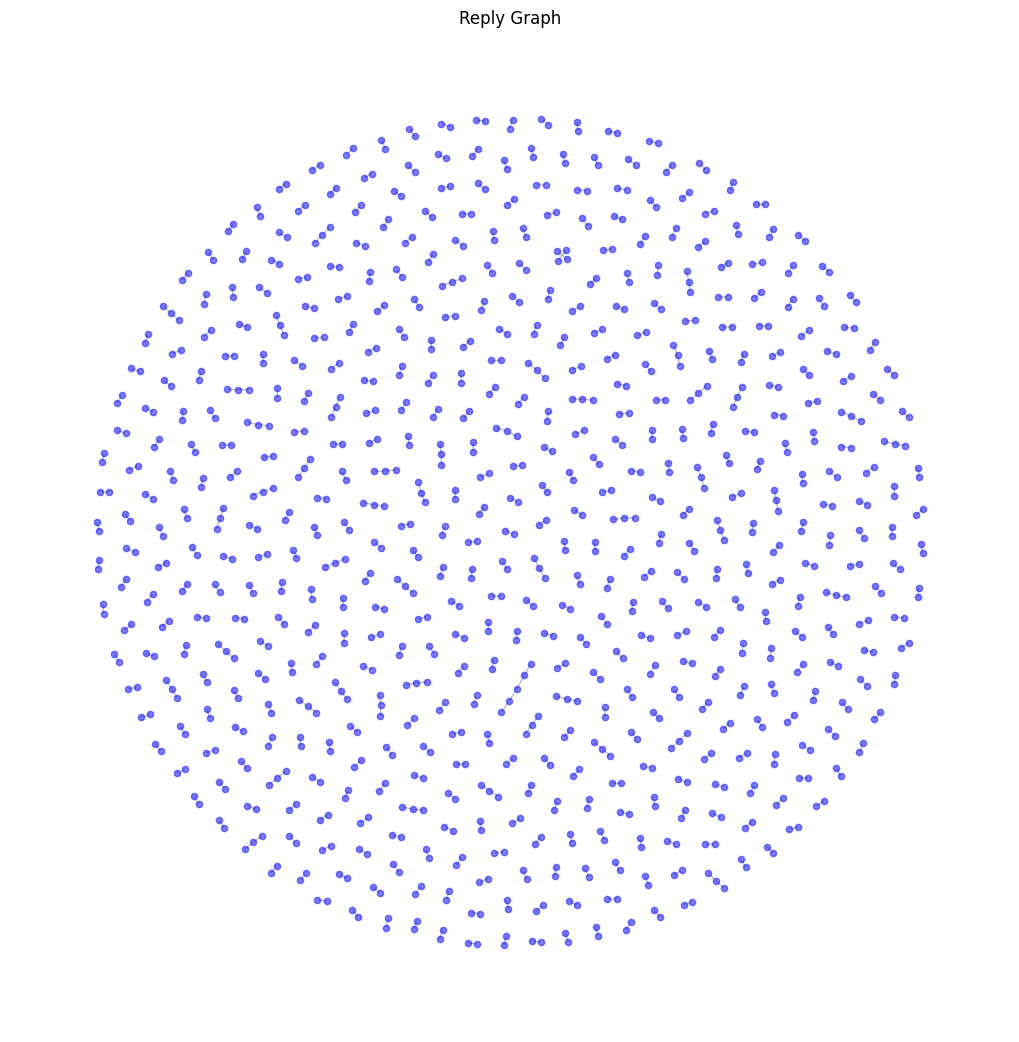

In [26]:
### plot reply_graph 

plt.figure(figsize=(10, 10))
pos = nx.spring_layout(reply_graph, seed=42)
nx.draw(reply_graph, pos, node_size=20, node_color="blue", edge_color="gray", alpha=0.5)
plt.title("Reply Graph")
plt.show()


In [ ]:
import pandas as pd
import networkx as nx

df2 = df_tweets.copy()
df2["tweet_id"] = df2["tweet_id"].astype(str)
df2["in_reply_to_status_id"] = (
    df2["in_reply_to_status_id"]
    .astype(str)
    .where(df2["in_reply_to_status_id"].notna(), pd.NA)
)

edges_df = df2.loc[df2["in_reply_to_status_id"].notna(), ["tweet_id", "in_reply_to_status_id"]]
edges = list(edges_df.itertuples(index=False, name=None))  

DG = nx.DiGraph()
DG.add_edges_from(edges)



Count of middle tweets B (A <- B <- C exists): 6


In [ ]:
UG = DG.to_undirected()
components3 = [c for c in nx.connected_components(UG) if len(c) == 3]

n_star_root = 0  
n_chain = 0      

for comp in components3:
    sub = DG.subgraph(comp)
   
    roots = [n for n in sub.nodes() if sub.in_degree(n) == 2]
    middles = [n for n in sub.nodes() if sub.out_degree(n) == 1 and sub.in_degree(n) == 1]

    if len(roots) == 1:
        
        n_star_root += 1
    elif len(middles) == 1:
        
        n_chain += 1
    else:
        n_other += 1

print("3-node components:", len(components3))
print(" stars (two replies to same tweet):", n_star_root)
print(" chains (reply-of-a-reply):", n_chain)
print(" other:", n_other)


3-node components: 46
  stars (two replies to same tweet): 43
  chains (reply-of-a-reply): 3
  other: 0


In [ ]:
import networkx as nx


meta = df2[["tweet_id", "text"]].drop_duplicates("tweet_id").set_index("tweet_id")["text"]

UG = DG.to_undirected()


components3 = [c for c in nx.connected_components(UG) if len(c) == 3]

stars = []  
chains = [] 

for comp in components3:
    sub = DG.subgraph(comp)

    
    roots = [n for n in sub.nodes() if sub.in_degree(n) == 2]
    if len(roots) == 1:
        A = roots[0]
        
        children = list(sub.predecessors(A))  
        if len(children) == 2:
            B, C = children[0], children[1]
            stars.append((A, B, C))
        continue

   
    middles = [n for n in sub.nodes() if sub.in_degree(n) == 1 and sub.out_degree(n) == 1]
    if len(middles) == 1:
        B = middles[0]
        A = next(sub.successors(B))    
        C = next(sub.predecessors(B))   
        chains.append((A, B, C))

print(f"3-node components: {len(components3)} | stars: {len(stars)} | chains: {len(chains)}")


print("\n" + "#"*80)
print("STAR components (B → A ← C): two replies to the same parent tweet A")
print("#"*80)

for i, (A, B, C) in enumerate(stars, start=1):
    print("\n" + "="*80)
    print(f"[STAR #{i}]")
    print(f"A (parent) : {A}")
    print(f"B (child)  : {B}  (B -> A)")
    print(f"C (child)  : {C}  (C -> A)")
    print("-"*80)
    print("A:", meta.get(A, "[missing]"))
    print("B:", meta.get(B, "[missing]"))
    print("C:", meta.get(C, "[missing]"))


print("\n" + "#"*80)
print("CHAIN components (C → B → A): reply-of-a-reply (depth 2 thread)")
print("#"*80)

for i, (A, B, C) in enumerate(chains, start=1):
    print("\n" + "="*80)
    print(f"[CHAIN #{i}]")
    print(f"A (parent) : {A}")
    print(f"B (middle) : {B}  (B -> A)")
    print(f"C (child)  : {C}  (C -> B)")
    print("-"*80)
    print("A:", meta.get(A, "[missing]"))
    print("B:", meta.get(B, "[missing]"))
    print("C:", meta.get(C, "[missing]"))


3-node components: 46 | stars: 43 | chains: 3

################################################################################
STAR components (B → A ← C): two replies to the same parent tweet A
################################################################################

[STAR #1]
A (parent) : 759506712516784128
B (child)  : 759506924903751680  (B -> A)
C (child)  : 759507042205786112  (C -> A)
--------------------------------------------------------------------------------
A: [missing]
B: @realDonaldTrump fuck NAFTA. Fuck TPP. President Trump is the only way! #MakeAmericaGreatAgain
C: @realDonaldTrump Great poll! Make America great Again! https://t.co/fRfGi7RJww

[STAR #2]
A (parent) : 777315293936881664
B (child)  : 777315471750230016  (B -> A)
C (child)  : 777317312315596800  (C -> A)
--------------------------------------------------------------------------------
A: [missing]
B: @HillaryClinton Ok close it now!
C: @HillaryClinton yet you began your career with successfully de